In [81]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
with open ("output.log") as f:
    data_lines = f.readlines()[1::2]
clean_data = [word.rstrip().lstrip().split(":")  for data_line in data_lines for word in data_line.split('\t') if word != '']
clean_data

[['iter', ' 425'],
 ['time per iter', ' 0.0079'],
 ['Epoch time', ' 3.37'],
 ['average_loss',
  ' [0.4675578991572062, 0.9915739154457149, 0.7211990492660914, 0.5032122690569271]'],
 ['average_reward',
  ' [-0.023057092065908, -0.3964458532690291, -0.5915424014338981, -0.08191406650885069]'],
 ['iter', ' 219'],
 ['time per iter', ' 0.0039'],
 ['Epoch time', ' 0.84'],
 ['average_loss', ' [0.41496235, 0.5654355, 0.47603196, 0.42769617]'],
 ['average_reward',
  ' [-0.045237513227790536, -0.06301869449416835, 0.2144279667351087, 0.061678167245519985]'],
 ['iter', ' 203'],
 ['time per iter', ' 0.0057'],
 ['Epoch time', ' 1.16'],
 ['average_loss', ' [0.46553624, 0.48903787, 0.43310633, 0.44402465]'],
 ['average_reward',
  ' [-0.4397647511294715, 0.186590721007587, 0.24323019784350025, 0.060910629200140655]'],
 ['iter', ' 365'],
 ['time per iter', ' 0.0046'],
 ['Epoch time', ' 1.69'],
 ['average_loss', ' [0.5341265, 0.5040426, 0.3994004, 0.43408382]'],
 ['average_reward',
  ' [-0.859361471889

In [83]:

loss_data_dict = {key:[] for key in dict(clean_data).keys()}
loss_data_dict

{'iter': [],
 'time per iter': [],
 'Epoch time': [],
 'average_loss': [],
 'average_reward': []}

In [84]:
for i in range(0,len(clean_data),len(loss_data_dict)):
    for j in range(len(loss_data_dict)):
        k = clean_data[i+j][0]
        v = clean_data[i+j][1]
        v = v.replace('nan', 'np.nan')

        eval_v = eval(v)
            
        loss_data_dict[k].append(eval_v)

robot_count = len(loss_data_dict['average_loss'][0])
epochs_range = len(loss_data_dict['iter'])
loss_data_dict['average_loss'] = np.array(loss_data_dict['average_loss'])
loss_data_dict['average_reward'] = np.array(loss_data_dict['average_reward'])

In [85]:
loss_data_dict['average_loss'].shape

(600, 4)

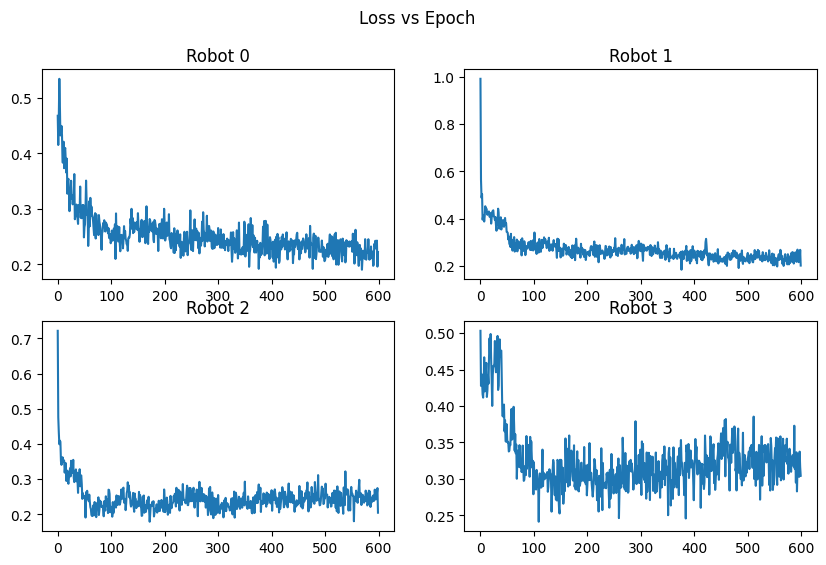

In [87]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_loss'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Loss vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()


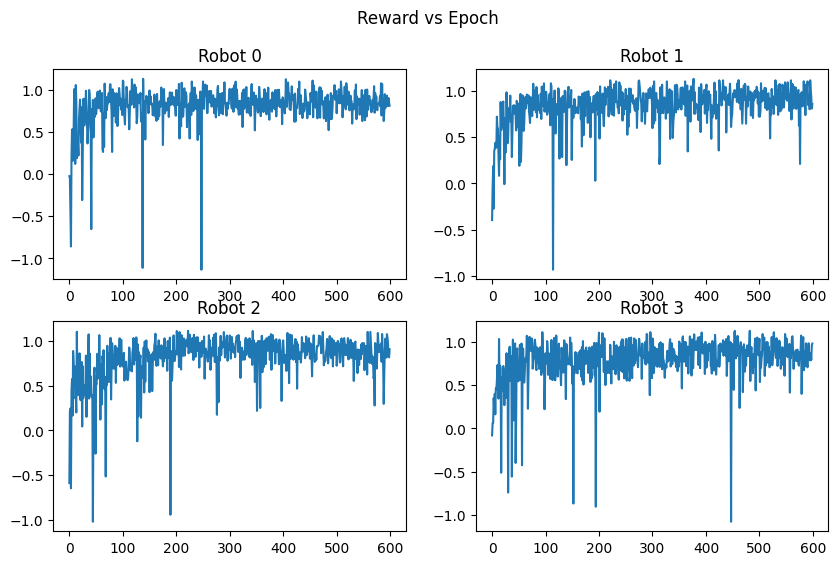

In [88]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_reward'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Reward vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()

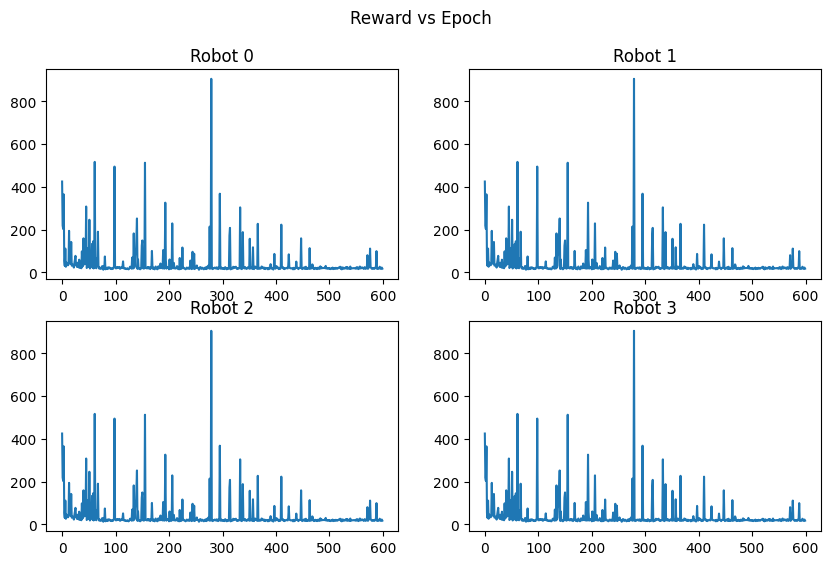

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['iter'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Num Iterations vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()

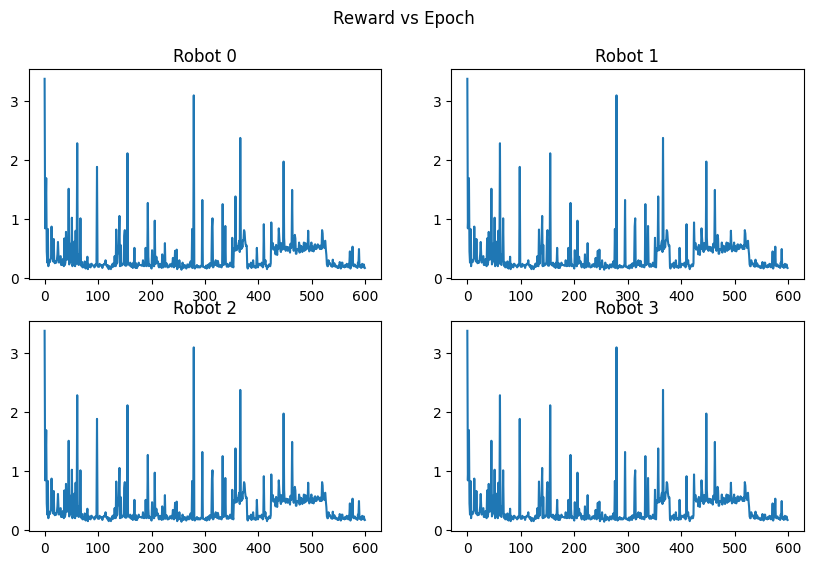

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['Epoch time'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Epoch Time vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()